In [1]:
import pandas as pd
from pycaret.classification import load_model, interpret_model, setup

# load data
data = pd.read_csv('data/df_features_imputed.csv')

clf = setup(data, target='TARGET')
# load model
best_model = load_model('best_model_pycaret')

# interpret the model
interpret_model(best_model)

,Description,Value
0,Session id,8250
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(103744, 86)"
4,Transformed data shape,"(103744, 86)"
5,Transformed train set shape,"(72620, 86)"
6,Transformed test set shape,"(31124, 86)"
7,Numeric features,85
8,Preprocess,True
9,Imputation type,simple


Transformation Pipeline and Model Successfully Loaded


TypeError: This function only supports tree based models for binary classification: dt, et, rf, lightgbm.

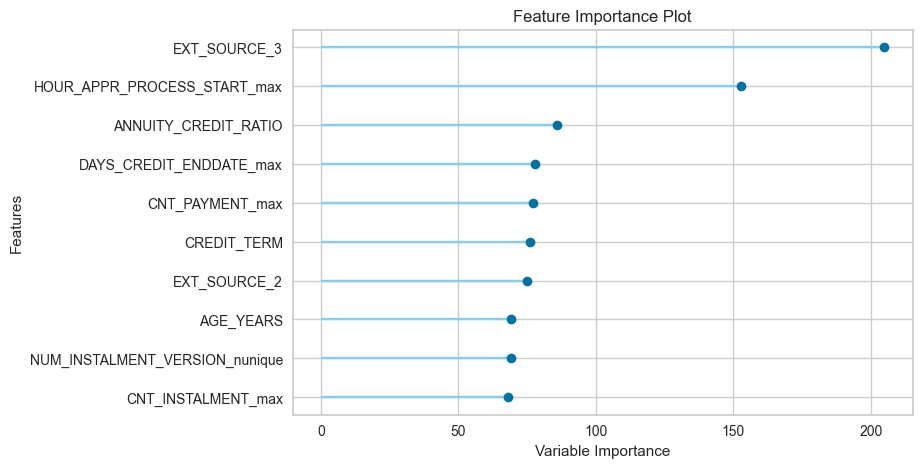

In [8]:
from pycaret.classification import plot_model

plot_model(best_model, plot='feature')

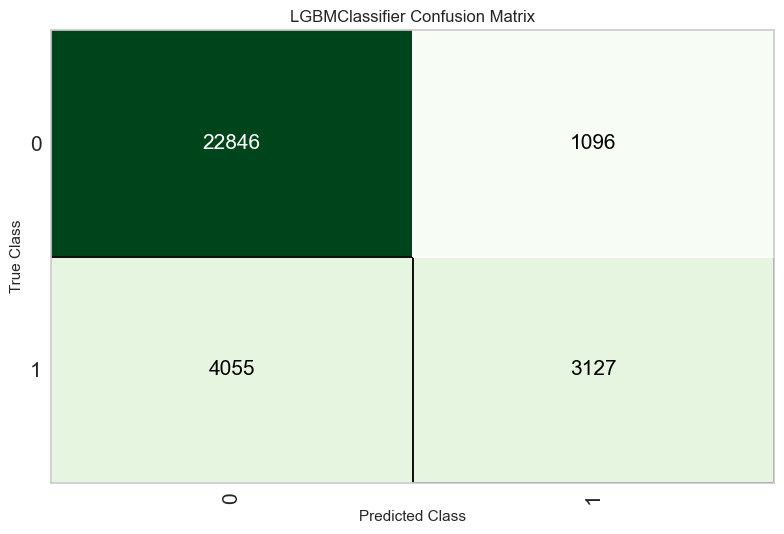

In [9]:
plot_model(best_model, plot='confusion_matrix')

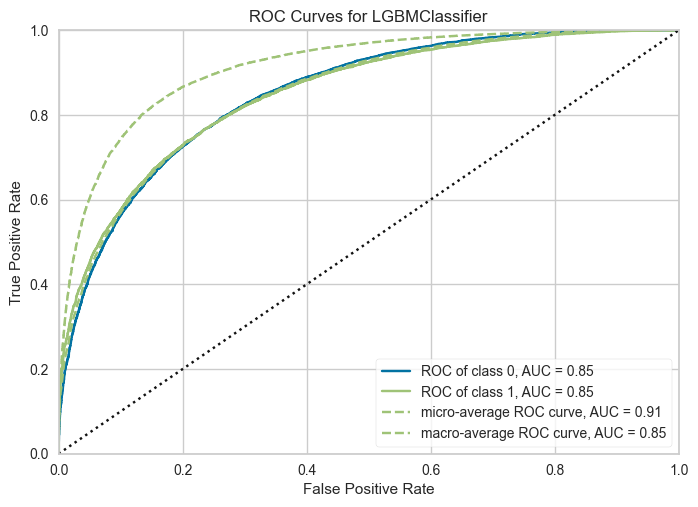

In [10]:
plot_model(best_model, plot='auc')

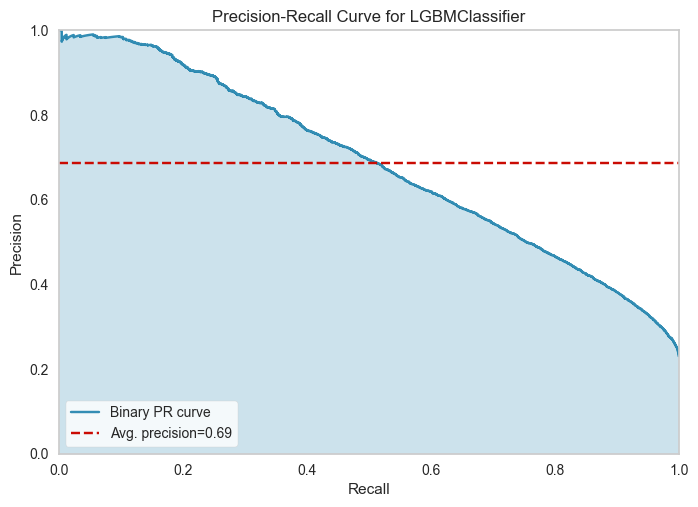

In [11]:
plot_model(best_model, plot='pr')

In [12]:
from pycaret.classification import evaluate_model

evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Description,Value
0,Session id,2840
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(103744, 86)"
4,Transformed data shape,"(103744, 86)"
5,Transformed train set shape,"(72620, 86)"
6,Transformed test set shape,"(31124, 86)"
7,Numeric features,85
8,Preprocess,True
9,Imputation type,simple


Transformation Pipeline and Model Successfully Loaded


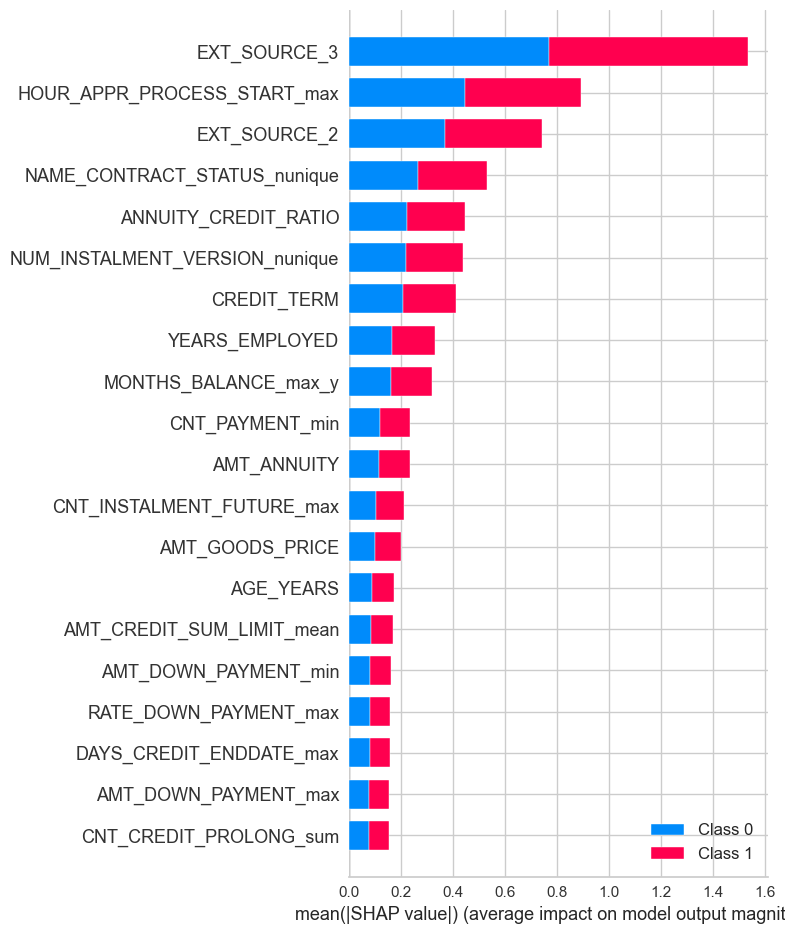

In [10]:
import shap
import pandas as pd
from pycaret.classification import setup, load_model
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data/df_features_imputed.csv')

# Инициализация среды PyCaret
clf = setup(data, target='TARGET', html=True)

# Загрузка модели
best_model = load_model('best_model_pycaret')

# Извлечение основной модели
model = best_model.named_steps['actual_estimator']

# Использование TreeExplainer для создания объяснителя
explainer = shap.TreeExplainer(model)

# Получение значений SHAP для всего датасета
shap_values = explainer.shap_values(data.drop(columns='TARGET'))

# Визуализация для одного предсказания
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], data.drop(columns='TARGET').iloc[0,:])
plt.show()

# Визуализация важности фичей для всей модели
shap.summary_plot(shap_values, data.drop(columns='TARGET'))